Chapter 6

Script 6-1: Analyze change points in Apple and Alphabet stock values

In [1]:
#import packages
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#import Apple and Alphabet stock data
File="C:/users/njfar/OneDrive/Desktop/AAPL_GOOGL_Stock_2004_2020.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
mydata=pd.read_csv(os.path.basename(File),encoding='latin1')

In [3]:
#script to create time slices, derive networks, and compute centrality metrics
stock_networks=[]
bet_t=[]
deg_t=[]
eig_t=[]
vcurv_t=[]
bet_ave=[]
deg_ave=[]
eig_ave=[]
vcurv_ave=[]
for Date in range(5,3932):
    #wrangle data into graph
    data=mydata.iloc[(Date-5):(Date),1:5]
    cor=np.corrcoef(data.transpose())
    cor[cor>=0.5]=1
    cor[cor<0.5]=0
    stock_data=Graph.Adjacency(cor)
    stock_networks.append(stock_data)
    #derive some centrality metrics
    d=Graph.degree(stock_data)
    deg_t.append(d)
    deg_ave.append(np.mean(d))
    b=Graph.betweenness(stock_data)
    bet_t.append(b)
    bet_ave.append(np.mean(b))
    e=Graph.pagerank(stock_data)
    eig_t.append(e)
    eig_ave.append(np.mean(e))
    #create Forman-Ricci curvature calculations
    ecurvw=[]
    for edge in stock_data.es:
        s=edge.source
        t=edge.target
        ecurvw.append(2-d[s]-d[t])
    vcurvw=[]
    for vertex in stock_data.vs:
        inc=Graph.incident(stock_data,vertex)
        inc_curv=[]
        for i in inc:
            inc_curv.append(ecurvw[i])
        vcurvw.append(sum(inc_curv))
    vcurv_t.append(vcurvw)
    vcurv_ave.append(np.mean(vcurvw))

In [4]:
#examine correlations among metrics across the time series
print(np.corrcoef(deg_ave,eig_ave))
print(np.corrcoef(deg_ave,bet_ave))
print(np.corrcoef(deg_ave,vcurv_ave))
print(np.corrcoef(eig_ave,bet_ave))
print(np.corrcoef(eig_ave,vcurv_ave))
print(np.corrcoef(bet_ave,vcurv_ave))

[[ 1.        -0.0456318]
 [-0.0456318  1.       ]]
[[1.         0.01328503]
 [0.01328503 1.        ]]
[[ 1.         -0.99234485]
 [-0.99234485  1.        ]]
[[1.         0.04025885]
 [0.04025885 1.        ]]
[[1.         0.04428258]
 [0.04428258 1.        ]]
[[1.        0.0497143]
 [0.0497143 1.       ]]


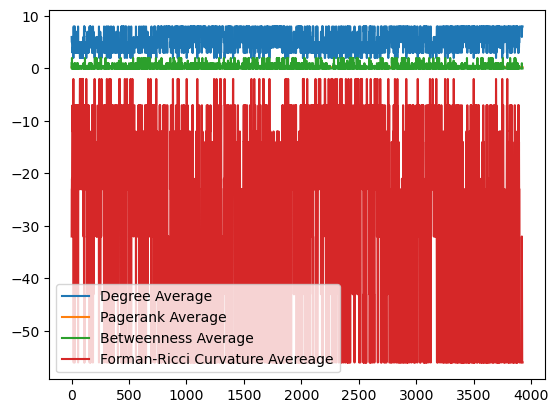

In [5]:
#plot metric averages across time slices
time=range(0,3927)
plt.plot(time, deg_ave, label = "Degree Average")
plt.plot(time, eig_ave, label = "Pagerank Average")
plt.plot(time, bet_ave, label = "Betweenness Average")
plt.plot(time, vcurv_ave, label = "Forman-Ricci Curvature Avereage")
plt.legend()
plt.show()

In [6]:
#script to create time slices, derive networks, and compute centrality metrics
stock_networks=[]
bet_t=[]
deg_t=[]
eig_t=[]
vcurv_t=[]
bet_ave=[]
deg_ave=[]
eig_ave=[]
vcurv_ave=[]
for Date in range(5,3932):
    #wrangle data into graph
    data=mydata.iloc[(Date-5):(Date),1:5]
    cor=np.corrcoef(data.transpose())
    cor[cor>=0.9]=1
    cor[cor<0.9]=0
    stock_data=Graph.Adjacency(cor)
    stock_networks.append(stock_data)
    #derive some centrality metrics
    d=Graph.degree(stock_data)
    deg_t.append(d)
    deg_ave.append(np.mean(d))
    b=Graph.betweenness(stock_data)
    bet_t.append(b)
    bet_ave.append(np.mean(b))
    e=Graph.pagerank(stock_data)
    eig_t.append(e)
    eig_ave.append(np.mean(e))
    #create Forman-Ricci curvature calculations
    ecurvw=[]
    for edge in stock_data.es:
        s=edge.source
        t=edge.target
        ecurvw.append(2-d[s]-d[t])
    vcurvw=[]
    for vertex in stock_data.vs:
        inc=Graph.incident(stock_data,vertex)
        inc_curv=[]
        for i in inc:
            inc_curv.append(ecurvw[i])
        vcurvw.append(sum(inc_curv))
    vcurv_t.append(vcurvw)
    vcurv_ave.append(np.mean(vcurvw))

In [7]:
#examine correlations among metrics across the time series
print(np.corrcoef(deg_ave,eig_ave))
print(np.corrcoef(deg_ave,bet_ave))
print(np.corrcoef(deg_ave,vcurv_ave))
print(np.corrcoef(eig_ave,bet_ave))
print(np.corrcoef(eig_ave,vcurv_ave))
print(np.corrcoef(bet_ave,vcurv_ave))

[[ 1.         -0.04131058]
 [-0.04131058  1.        ]]
[[1.         0.44484238]
 [0.44484238 1.        ]]
[[ 1.         -0.98316202]
 [-0.98316202  1.        ]]
[[1.         0.00304879]
 [0.00304879 1.        ]]
[[1.         0.04389723]
 [0.04389723 1.        ]]
[[ 1.         -0.38904143]
 [-0.38904143  1.        ]]


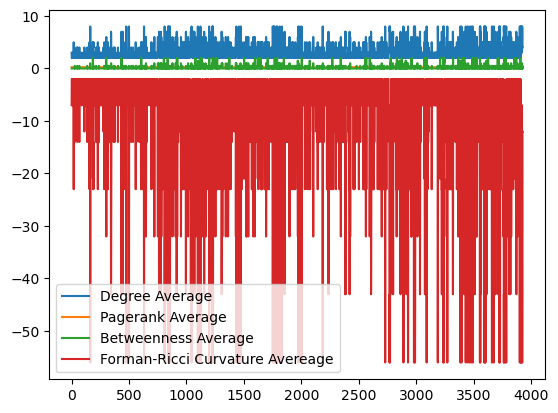

In [8]:
#plot metric averages across time slices
time=range(0,3927)
plt.plot(time, deg_ave, label = "Degree Average")
plt.plot(time, eig_ave, label = "Pagerank Average")
plt.plot(time, bet_ave, label = "Betweenness Average")
plt.plot(time, vcurv_ave, label = "Forman-Ricci Curvature Avereage")
plt.legend()
plt.show()

Script 6-2: Simplicial complex analysis of stock data

In [9]:
#define Vietoris-Rips complex
from itertools import combinations
from numpy import linalg as LA
def graph_VR(points, eps):
   points=[np.array(x) for x in points]   
   vr=[(x,y) for (x,y) in combinations(points, 2) if LA.norm(x - y) <= 2*eps]
   return np.array(vr)

In [10]:
#apply Vietoris-Rips with multiple thresholds to a slice of our stock dataset
data=mydata.iloc[0:5,1:5]
vr1=graph_VR(data.transpose(),1)
vr2=graph_VR(data.transpose(),10)

In [11]:
#print the results
print("Vietoris-Rips Complex, Threshold=1:")
print(vr1)
print("Vietoris-Rips Complex, Threshold=10:")
print(vr2)

Vietoris-Rips Complex, Threshold=1:
[[0 1]
 [0 2]
 [1 2]
 [1 3]
 [2 3]
 [2 4]
 [3 4]]
Vietoris-Rips Complex, Threshold=10:
[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [1 2]
 [1 3]
 [1 4]
 [2 3]
 [2 4]
 [3 4]]
